### Oscilador cuántico - Isabel Nieto y Leonardo Tovar

# 1. Solución Analítica del Oscilador Armónico Cuántico

Partimos de la ecuación de Schrödinger independiente del tiempo para una partícula de masa $m$ en un potencial armónico $V(x) = \frac{1}{2}m\omega^2x^2$:

$$-\frac{\hbar^2}{2m} \frac{d^2\psi}{dx^2} + \frac{1}{2}m\omega^2x^2\psi = E\psi$$

### Paso 1: Adimensionalización
Para simplificar la ecuación, introducimos una variable sin dimensiones $\xi$ y una constante de energía $\epsilon$:
* $\xi = \sqrt{\frac{m\omega}{\hbar}} x$
* $\epsilon = \frac{2E}{\hbar\omega}$

Sustituyendo en la ecuación original, obtenemos la forma reducida:
$$\frac{d^2\psi}{d\xi^2} + (\epsilon - \xi^2)\psi = 0$$

### Paso 2: Comportamiento Asintótico
Cuando $\xi \to \infty$, el término $\xi^2$ domina sobre $\epsilon$. La solución se comporta como $\psi(\xi) \sim e^{-\xi^2/2}$. Por lo tanto, proponemos una solución general de la forma:
$$\psi(\xi) = H(\xi) e^{-\xi^2/2}$$

Donde $H(\xi)$ es un polinomio. Al sustituir esta forma en la ecuación diferencial, llegamos a la **Ecuación Diferencial de Hermite**:
$$H'' - 2\xi H' + (\epsilon - 1)H = 0$$

### Paso 3: Cuantización y Polinomios de Hermite
Para que la función de onda sea normalizable (no explote en el infinito), la serie de potencias para $H(\xi)$ debe truncarse. Esto ocurre solo si:
$$\epsilon - 1 = 2n \quad \implies \quad \epsilon = 2n + 1$$
Sustituyendo $\epsilon = \frac{2E}{\hbar\omega}$, obtenemos los niveles de energía permitidos:
$$E_n = \hbar\omega \left( n + \frac{1}{2} \right), \quad n = 0, 1, 2, \dots$$

### Paso 4: Funciones de Onda Finales
Las soluciones para $H(\xi)$ son los **Polinomios de Hermite** ($H_n$). La función de onda normalizada es:
$$\psi_n(x) = \left( \frac{m\omega}{\pi\hbar} \right)^{1/4} \frac{1}{\sqrt{2^n n!}} H_n\left( \sqrt{\frac{m\omega}{\hbar}}x \right) e^{-\frac{m\omega x^2}{2\hbar}}$$

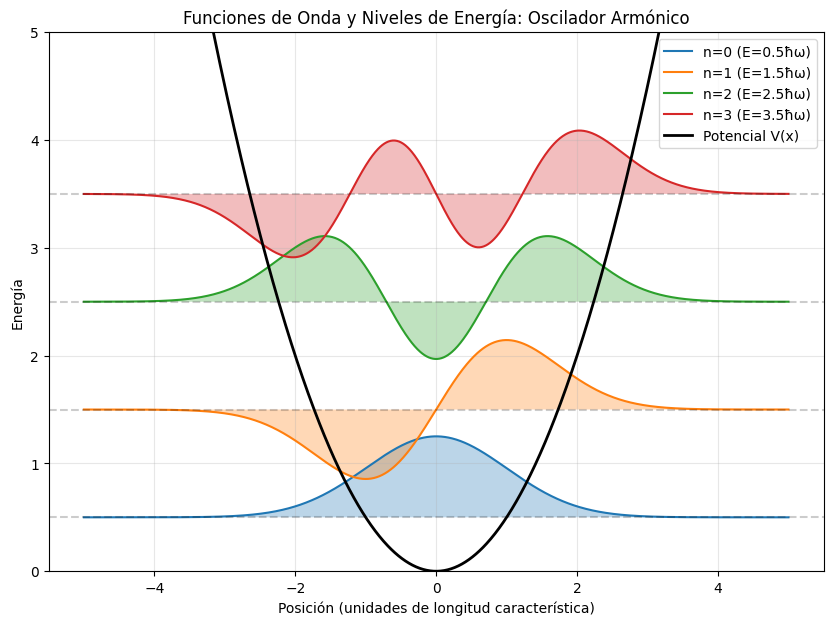

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hermite
from math import factorial

# Definimos las unidades naturales m = hbar = omega = 1
def psi_n(n, x):
    # Polinomio de Hermite de orden n
    H_n = hermite(n)
    # Constante de normalización
    N_n = 1.0 / np.sqrt(2**n * factorial(n) * np.sqrt(np.pi))
    return N_n * H_n(x) * np.exp(-x**2 / 2)

# Configuración del gráfico
x = np.linspace(-5, 5, 1000)
plt.figure(figsize=(10, 7))

# Graficamos los primeros 4 niveles
for n in range(4):
    y = psi_n(n, x)
    energy = n + 0.5
    plt.plot(x, y + energy, label=f'n={n} (E={energy}ħω)')
    plt.fill_between(x, energy, y + energy, alpha=0.3)
    plt.axhline(energy, color='black', linestyle='--', alpha=0.2)

# Dibujar el potencial parabólico V(x) = 0.5 * x^2
plt.plot(x, 0.5 * x**2, 'k', linewidth=2, label='Potencial V(x)')

plt.title('Funciones de Onda y Niveles de Energía: Oscilador Armónico')
plt.xlabel('Posición (unidades de longitud característica)')
plt.ylabel('Energía')
plt.ylim(0, 5)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 2. Enmallado hasta 1000

In [ ]:
!gfortran osciladorCuantico.f90 diagotri.f90 -osciladorCuantico

In [ ]:
!./sciladorCuantico

  50   0.494948   1.474526   2.433112   3.369958   4.284221   5.174939
 100   0.498747   1.493722   2.483639   3.468459   4.448141   5.422645
 200   0.499687   1.498436   2.495931   3.492170   4.487150   5.480870
 400   0.499922   1.499609   2.498984   3.498046   4.496795   5.495230
 800   0.499980   1.499902   2.499746   3.499512   4.499199   5.498808
1000   0.499987   1.499937   2.499837   3.499687   4.499487   5.499237

 Autovectores en data_oscilador


## 3 y 4. Gráfica interactiva y nuevo eje

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Cargar los datos del archivo data_oscilador
data = np.loadtxt("data_oscilador")
x = data[:, 0] # La primera columna es la posición x

def plot_probability_density(n):
    fig, ax1 = plt.subplots(figsize=(10, 7))

    # Plot de la función de probabilidad en el eje izquierdo (ax1) con escala constante 0-0.5
    if 0 <= n <= 5:
        ax1.plot(x, data[:, n + 1], label=f'n={n}', color='blue')
        ax1.set_title(f'Función de Probabilidad y Nivel de Energía para n={n}')
        ax1.set_xlabel('Posición (x)')
        ax1.set_ylabel(r'$|\psi_n(x)|^2$', color='blue')
        ax1.tick_params(axis='y', labelcolor='blue')
        ax1.set_ylim(0, 0.6) # Rango de probabilidad constante solicitado por el usuario
        ax1.grid(True) # Reaplicar la cuadrícula si se desea en ax1

        # Crear un segundo eje Y en el lado derecho para la energía (escala dinámica)
        ax2 = ax1.twinx()
        energy = n + 0.5
        ax2.set_ylabel('Nivel de Energía (ħω)', color='red')
        ax2.set_ylim(0, 6) # Rango de energía dinámica para n=0 a n=5 (0.5 a 5.5)
        ax2.set_yticks([energy])
        ax2.set_yticklabels([f'{energy:.1f}']) # Mostrar el valor de energía con un decimal
        ax2.tick_params(axis='y', labelcolor='red')
        ax2.axhline(energy, color='red', linestyle='--', alpha=0.5, label=f'E_{n}={energy}ħω')

        # Unificar leyendas
        lines, labels = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines + lines2, labels + labels2, loc='upper left') # Mover leyenda a ax1 para evitar superposición

        plt.show()
    else:
        print(f"El nivel de energía n={n} no está disponible en los datos (rango 0-5).")

# Crear un deslizador interactivo para n
n_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=5, # Hay 6 funciones de onda (n=0 a n=5)
    step=1,
    description='Nivel n:',
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

# Mostrar el interactivo
widgets.interactive(plot_probability_density, n=n_slider)

interactive(children=(IntSlider(value=0, description='Nivel n:', max=5), Output()), _dom_classes=('widget-inte…

In [ ]:
modified_fortran_code = fortran_code.replace("d(i)=2.d0*h_2+xi*xi", "d(i)=2.d0*h_2+xi**4")
modified_fortran_code = modified_fortran_code.replace("open(unit=1,file=\"data_oscilador\")", "open(unit=1,file=\"data_anharmonic\")")

with open('anharmonicOscillator.f90', 'w') as f:
    f.write(modified_fortran_code)

print("anharmonicOscillator.f90 has been created with anharmonic potential.")

anharmonicOscillator.f90 has been created with anharmonic potential.


In [ ]:
get_ipython().run_line_magic('system', 'gfortran anharmonicOscillator.f90 diagotri.f90 -o anharmonicOscillator')

[]

In [ ]:
get_ipython().run_line_magic('system', './anharmonicOscillator')

[' los 6 primeros autovalores:',
 '  50      0.521      1.831      3.494      5.268      7.052      8.765',
 ' 100      0.528      1.883      3.670      5.687      7.870     10.177',
 ' 200      0.530      1.896      3.713      5.789      8.066     10.510',
 ' 400      0.530      1.899      3.724      5.814      8.115     10.592',
 ' 800      0.530      1.900      3.727      5.820      8.127     10.612',
 '1000      0.530      1.900      3.727      5.821      8.128     10.615',
 '',
 ' Autovectores en data_oscilador']

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Anharmonic energy levels extracted from the Fortran program output for N=1000
# These correspond to n=0 to n=5 (E0 to E5)
anharmonic_energies = np.array([0.530, 1.900, 3.727, 5.821, 8.128, 10.615])

# Cargar los datos del archivo data_anharmonic
data_anharmonic = np.loadtxt("data_anharmonic")
x_anharmonic = data_anharmonic[:, 0] # La primera columna es la posición x

def plot_probability_density_anharmonic(n):
    fig, ax1 = plt.subplots(figsize=(10, 7))

    # Plot de la función de probabilidad en el eje izquierdo (ax1) con escala constante 0-0.5
    if 0 <= n <= 5:
        ax1.plot(x_anharmonic, data_anharmonic[:, n + 1], label=f'n={n}', color='blue')
        ax1.set_title(f'Función de Probabilidad y Nivel de Energía para n={n} (Potencial Anarmónico)')
        ax1.set_xlabel('Posición (x)')
        ax1.set_ylabel(r'$|\psi_n(x)|^2$', color='blue')
        ax1.tick_params(axis='y', labelcolor='blue')
        ax1.set_ylim(0, 0.6) # Rango de probabilidad constante solicitado por el usuario
        ax1.grid(True)

        # Crear un segundo eje Y en el lado derecho para la energía (escala dinámica)
        ax2 = ax1.twinx()
        energy = anharmonic_energies[n] # Usar los niveles de energía anarmónicos
        ax2.set_ylabel('Nivel de Energía (ħω)', color='red')
        ax2.set_ylim(0, 11) # Ajustar el rango máximo de energía para incluir E5=10.615
        ax2.set_yticks([energy])
        ax2.set_yticklabels([f'{energy:.3f}']) # Mostrar el valor de energía con tres decimales
        ax2.tick_params(axis='y', labelcolor='red')
        ax2.axhline(energy, color='red', linestyle='--', alpha=0.5, label=f'E_{n}={energy:.3f}ħω')

        # Unificar leyendas
        lines, labels = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines + lines2, labels + labels2, loc='upper left')

        plt.show()
    else:
        print(f"El nivel de energía n={n} no está disponible en los datos (rango 0-5).")

# Crear un deslizador interactivo para n
n_slider_anharmonic = widgets.IntSlider(
    value=0,
    min=0,
    max=5, # Hay 6 funciones de onda (n=0 a n=5)
    step=1,
    description='Nivel n:',
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

# Mostrar el interactivo
widgets.interactive(plot_probability_density_anharmonic, n=n_slider_anharmonic)

interactive(children=(IntSlider(value=0, description='Nivel n:', max=5), Output()), _dom_classes=('widget-inte…

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Load data from data_oscilador (harmonic)
data_harmonic = np.loadtxt("data_oscilador")
# Load data from data_anharmonic (anharmonic)
data_anharmonic = np.loadtxt("data_anharmonic")

# Extract the common x-axis values
x_comparison = data_harmonic[:, 0]

# Define harmonic energy levels
harmonic_energies = np.array([n + 0.5 for n in range(6)])

# Anharmonic energy levels extracted from the Fortran program output for N=1000
# These correspond to n=0 to n=5 (E0 to E5)
# Using the already defined anharmonic_energies from previous cell
# anharmonic_energies = np.array([0.530, 1.900, 3.727, 5.821, 8.128, 10.615]) # This variable already exists in the kernel state

def plot_oscillator_comparison(n):
    fig, ax1 = plt.subplots(figsize=(12, 8))

    # Plot probability densities on ax1 (left y-axis)
    ax1.plot(x_comparison, data_harmonic[:, n + 1], label=fr'Harmonic $|\psi_{n}(x)|^2$', color='blue', linestyle='-')
    ax1.plot(x_comparison, data_anharmonic[:, n + 1], label=fr'Anharmonic $|\psi_{n}(x)|^2$', color='green', linestyle='--')
    ax1.set_xlabel('Posición (x)')
    ax1.set_ylabel(r'$|\psi_n(x)|^2$ (Densidad de Probabilidad)', color='black')
    ax1.tick_params(axis='y')
    ax1.set_ylim(0, 0.7) # Fixed range as requested
    ax1.grid(True, linestyle=':', alpha=0.6)

    # Create a second y-axis on the right for energy levels
    ax2 = ax1.twinx()

    harmonic_energy = harmonic_energies[n]
    anharmonic_energy = anharmonic_energies[n]

    # Plot energy levels as horizontal lines on ax2
    ax2.axhline(harmonic_energy, color='cyan', linestyle='-', alpha=0.7, label=fr'Harmonic $E_{n}={harmonic_energy:.1f}\hbar\omega$')
    ax2.axhline(anharmonic_energy, color='red', linestyle='--', alpha=0.7, label=fr'Anharmonic $E_{n}={anharmonic_energy:.3f}\hbar\omega$')

    ax2.set_ylabel(r'Energía ($\hbar\omega$)', color='black')

    # Dynamic y-limit for energy levels
    min_energy_val = min(harmonic_energy, anharmonic_energy) - 0.5
    max_energy_val = max(harmonic_energy, anharmonic_energy) + 0.5
    # Ensure the range includes 0 and goes up to a reasonable maximum for all n
    ax2.set_ylim(0, max(harmonic_energy + 1, anharmonic_energy + 1, 6.0)) # Adjusted to ensure good visibility for all states
    ax2.set_yticks(np.unique([harmonic_energy, anharmonic_energy])) # Set ticks only at actual energy levels
    ax2.tick_params(axis='y')

    ax1.set_title(f'Comparación del Oscilador Armónico y Anarmónico para n={n}')

    # Unify legends from both axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', bbox_to_anchor=(1.0, 1.2))

    plt.tight_layout()
    plt.show()

# Create an ipywidgets.IntSlider for the quantum number n
n_slider_comparison = widgets.IntSlider(
    value=0,
    min=0,
    max=5, # Range from n=0 to n=5
    step=1,
    description='Nivel n:',
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

# Display the interactive plot (removed trailing print statements)
print("Interactive Comparison Plot:") # Keep this print, but remove the one after widgets.interactive
widgets.interactive(plot_oscillator_comparison, n=n_slider_comparison)

Interactive Comparison Plot:


interactive(children=(IntSlider(value=0, description='Nivel n:', max=5), Output()), _dom_classes=('widget-inte…